# Bank Loan Report Summary

## Domain Knowledge
` Purpose: Loans enable individuals and businesses to achieve goals while managing financial needs.`
- Banks collect loan data through various channels and processes, including:








## Data Collection Sources: 
- Loan Applications (personal/financial data).
- Credit Reports (credit history, existing loans).
- Internal Records (loan transactions, repayments).
- Online Portals (borrower activities).
- Third-party Sources (e.g., income verification).


## Loan Granting Process :
- Loan Application: Submission through various channels.
- Application Review: Collecting documentation (income statements, credit reports, etc.).
- Verification Checks: Identity, credit, income, employment, and collateral (if applicable).
- Risk Assessment: Evaluating credit risk, income stability, and loan purpose.
- Approval or Denial: Decision based on risk; terms finalized if approved.
- Loan Agreement: Terms, interest rate, and repayment schedule agreed upon.
- Disbursement: Funds transferred to borrower.
- Repayment: Borrower repays principal + interest as per schedule.
- Ongoing Monitoring: Tracking payments, financial health, and defaults.

## Reasons for Loan Data Analysis :
Banks analyze loan data to achieve the following objectives:

- Risk Assessment: Evaluate borrower creditworthiness, predict default probabilities, and determine lending terms.
- Decision-Making: Support loan approval or denial decisions using data-driven models.
- Portfolio Management: Monitor loan portfolio health, optimize terms, and identify underperforming loans.
- Fraud Detection: Identify fraudulent applications through unusual patterns or inconsistencies.
- Regulatory Compliance: Meet legal requirements like HMDA and KYC through accurate data collection and reporting.
- Customer Insights: Understand customer behavior to customize loan products and marketing strategies.
- Profitability Analysis: Measure loan portfolio profitability by analyzing income, costs, and default rates.
- Market Research: Track market trends and competition to inform product development and strategy.
- Credit Risk Management: Manage credit risk through strategies, loss provisioning, and stress testing.
- Customer Retention: Enhance customer loyalty by offering refinancing or additional financial products.
This ensures efficient lending practices, compliance, and enhanced customer satisfaction.

# Data Accessing

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('financial_loan.csv')

In [9]:
#column types
df.info()

# change the dtypes to required types to Perfrom EDA moving forward

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

### Here are descriptions of the columns in our dataset:  

- 1. **id**: Unique identifier for the loan application.  
- 2. **address_state**: The state of the applicant's residence.  
- 3. **application_type**: Type of application (e.g., INDIVIDUAL or JOINT).  
- 4. **emp_length**: Length of employment in years (e.g., "< 1 year", "10+ years").  
- 5. **emp_title**: Job title of the applicant.  
- 6. **grade**: Loan grade assigned by the lender, indicating credit risk (e.g., A, B, C).  
- 7. **home_ownership**: Applicant's homeownership status (e.g., RENT, MORTGAGE, OWN).  
- 8. **issue_date**: Date when the loan was issued.  
- 9. **last_credit_pull_date**: Date of the most recent credit report pull for the applicant.  
- 10. **last_payment_date**: Date of the applicant's most recent loan payment.  
- 11. **sub_grade**: Subcategory of the loan grade, providing a more detailed risk assessment (e.g., A1, B2, C4).  
- 12. **term**: Loan term duration (e.g., 36 months, 60 months).  
- 13. **verification_status**: Status of income and employment verification (e.g., Verified, Source Verified, Not Verified).  
- 14. **annual_income**: Applicant's stated annual income.  
- 15. **dti**: Debt-to-income ratio, representing the applicant's monthly debt obligations as a percentage of their income.  
- 16. **installment**: Monthly loan installment amount.  
- 17. **int_rate**: Interest rate on the loan.  
- 18. **loan_amount**: Total loan amount approved for the applicant.  
- 19. **total_acc**: Total number of credit accounts the applicant has.  
- 20. **total_payment**: Total amount paid by the applicant over the loan term.  



In [11]:
#check for nulls
df.set_index('id', inplace=True) #ID is our unique identifier


In [12]:

# Convert date columns to datetime
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], format='%d-%m-%Y')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d-%m-%Y')
df['next_payment_date'] = pd.to_datetime(df['next_payment_date'], format='%d-%m-%Y')



In [13]:
# Convert categorical columns to category dtype
categorical_columns = [
    'address_state', 'application_type', 'emp_length', 'emp_title',
    'grade', 'home_ownership', 'loan_status', 'purpose',
    'sub_grade', 'term', 'verification_status'
]
df[categorical_columns] = df[categorical_columns].astype('category')




In [14]:
# Convert integer-like columns to int
integer_columns = ['loan_amount', 'total_acc', 'total_payment', 'member_id']
df[integer_columns] = df[integer_columns].astype('int64')

# Float columns 
float_columns = ['annual_income', 'dti', 'installment', 'int_rate']
df[float_columns] = df[float_columns].astype('float64')

# Confirm changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38576 entries, 1077430 to 682952
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   address_state          38576 non-null  category      
 1   application_type       38576 non-null  category      
 2   emp_length             38576 non-null  category      
 3   emp_title              37138 non-null  category      
 4   grade                  38576 non-null  category      
 5   home_ownership         38576 non-null  category      
 6   issue_date             38576 non-null  datetime64[ns]
 7   last_credit_pull_date  38576 non-null  datetime64[ns]
 8   last_payment_date      38576 non-null  datetime64[ns]
 9   loan_status            38576 non-null  category      
 10  next_payment_date      38576 non-null  datetime64[ns]
 11  member_id              38576 non-null  int64         
 12  purpose                38576 non-null  category      
 13 

In [15]:
#check for nulls
df.isnull().sum()

address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [16]:
# Convert emp_title from categorical to object (string)
df['emp_title'] = df['emp_title'].astype('object')

# Now fill missing values with "Unknown"
# Fill missing values with "Unknown" without using inplace=True
df['emp_title'] = df['emp_title'].fillna('Unknown')


# I want to retain the rows, and the emp title has numerous options so i have filled it with unknown

In [17]:
df['emp_title'].isnull().sum()

0

In [18]:
df.isnull().sum()#confirming changes......

address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

### Note dtypes can be changed as our data analysis method progresses. Depends on the user performing EDA

In [20]:
df.describe(include=np.number)
#df.select_dtypes() to select only numeric columns:

,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Summary of Key Bank Loan Terminologies

- **Loan ID**: Unique identifier for each loan. Used by banks to track and manage loans throughout their lifecycle.
  
- **Address State**: Borrower's location. Helps assess regional risk factors and tailor loan offerings based on geography.

- **Employee Length**: Duration of employment. Longer employment suggests financial stability, influencing loan approval and terms.

- **Employee Title**: Borrower's job title. Used by banks to verify income sources and assess financial capacity.

- **Grade**: Risk classification based on creditworthiness. Higher grades signify lower risk, influencing loan pricing.

- **Sub Grade**: More specific risk assessment within a grade. Refines the loan's risk profile for better loan terms.

- **Home Ownership**: Borrower's housing status. Homeownership often correlates with financial stability, affecting risk evaluation.

- **Issue Date**: Date when the loan was originated. Used for tracking loan maturity and interest accruals.

- **Last Credit Pull Date**: Last time the borrower's credit report was accessed. Helps assess the current creditworthiness.

- **Last Payment Date**: The most recent loan payment. Used to track payment history and evaluate delinquency.

- **Loan Status**: Current status of the loan (e.g., fully paid, default). Monitors loan health and risk assessment.

- **Next Payment Date**: Date of the next loan payment. Assists in liquidity planning and revenue projections.

- **Purpose**: Reason for the loan (e.g., debt consolidation). Banks use it to segment borrowers and tailor loan terms.

- **Term**: Duration of the loan in months. Defines repayment period and structures loan agreements.

- **Verification Status**: Indicates whether the borrower’s financial information has been verified. Assesses the credibility of the loan application.

- **Annual Income**: Total yearly income of the borrower. Used to evaluate loan eligibility and repayment capacity.

- **DTI (Debt-to-Income Ratio)**: Ratio of borrower’s debt to income. Measures ability to take on additional debt and repay loans.

- **Installment**: Fixed monthly repayment amount. Helps structure loan repayment terms and assess affordability.

- **Interest Rate**: Annual cost of borrowing. Banks use it to price loans and manage profit margins.

- **Loan Amount**: The total borrowed sum. Defines the loan size and influences loan terms.

This summary highlights how each field in loan data is used by banks for risk assessment, loan management, and decision-making.ncipal amount.
Use for Banks: Banks use Loan Amount to determine loan size






# BANK LOAN REPORT | SUMMARY 



### MTD (Month-to-Date):

#### Definition 
MTD refers to the period starting from the beginning of the current month and continuing up until the present date. It is used to measure performance, financials, or activity within a given month.
#### Example
If today's date is December 28th, then MTD would cover the period from December 1st to December 28th.
#### Use in Bank Analysis
Banks use MTD to analyze current monthly performance, such as loan approvals, deposits, withdrawals, interest rates, or application counts. It helps to assess whether performance is on track for monthly targets.
### PMTD (Prior Month-to-Date):

#### Definition
PMTD refers to the same period of time but for the previous month. It is essentially the comparison of the current month’s data with that of the previous month for the same number of days.
#### Example
If today is December 28th, PMTD would cover the period from November 1st to November 28th. It allows banks to compare current performance to the same days in the previous month.
#### Use in Bank Analysis
Banks use PMTD to track trends and make month-over-month comparisons, evaluating whether the current month's performance is improving, declining, or staying consistent compared to the prior month.

In [25]:
#Total Loan Applications
print("Total loan applications",df['term'].count())

Total loan applications 38576


In [28]:
#MTD Loan Applications

print("MTD Loan Applications",df[df['issue_date'].dt.month==12].shape[0])

MTD Loan Applications 4314


In [31]:
#PMTD Loan Applications
print("PMTD Loan Applications",df[df['issue_date'].dt.month==11].shape[0])

PMTD Loan Applications 4035


In [37]:
#Total Funded Amount
print("Total Funded Amount",df['loan_amount'].sum())

Total Funded Amount 435757075


In [40]:
#MTD Total Funded Amount
print("MTD Total Funded Amount",df[df['issue_date'].dt.month==12]['loan_amount'].sum())

MTD Total Funded Amount 53981425


In [42]:
#PMTD Total Funded Amount
print("PMTD Total Funded Amount",df[df['issue_date'].dt.month==11]['loan_amount'].sum())

PMTD Total Funded Amount 47754825


In [45]:
#Total Amount Received
print("Total Amount Collected",df['total_payment'].sum())

Total Amount Collected 473070933


In [48]:
#MTD Total Amount Received
print("MTD Total Amount Collected",df[df['issue_date'].dt.month==12]['total_payment'].sum())

MTD Total Amount Collected 58074380


In [52]:
#PMTD Total Amount Received
print("PMTD Total Amount Collected",df[df['issue_date'].dt.month==11]['total_payment'].sum())

PMTD Total Amount Collected 50132030


In [54]:
#Average Interest Rate
print(f"Average Interest Rate: {(df['int_rate']*100).mean():.2f}%")

Average Interest Rate: 12.05%


In [56]:
#MTD Average Interest
print(f"MTD Average Interest: {(df[df['issue_date'].dt.month==12]['int_rate']*100).mean():.2f}%")

MTD Average Interest: 12.36%


In [58]:
#PMTD Average Interest
print(f"PMTD Average Interest: {(df[df['issue_date'].dt.month==11]['int_rate']*100).mean():.2f}%")

PMTD Average Interest: 11.94%


In [60]:
#Avg DTI
print(f"Average DTI: {(df['dti']*100).mean():.2f}%")

Average DTI: 13.33%


#### MTD AND PMTD, Both metrics are valuable for tracking and comparing the bank’s operational performance and making informed business decisions.








# GOOD LOAN ISSUED

In [64]:
#Good Loan Percentage

In [66]:


# Count the total number of loans
total_loans = len(df)

# Count the number of good loans
good_loans = df[df['loan_status'].isin (["Fully Paid", "Current"])].shape[0]

# Calculate the percentage of good loans
good_loan_percentage = (good_loans / total_loans) * 100

print(f"Good Loan Percentage: {good_loan_percentage:.2f}%")




Good Loan Percentage: 86.18%


In [68]:
#good loan applications
df[df['loan_status'].isin (["Fully Paid", "Current"])].shape[0]
print(f"Good Loan Applications: {df[df['loan_status'].isin (["Fully Paid", "Current"])].shape[0]}")

Good Loan Applications: 33243


In [70]:
#Good Loan Funded Amount
Good_Loan_Funded_Amount=df[df['loan_status'].isin (["Fully Paid", "Current"])]['loan_amount'].sum()
print(f"Good Loan Applications: {Good_Loan_Funded_Amount}")

Good Loan Applications: 370224850


In [72]:
#Good Loan Amount Received
Good_Loan_Amount_Received=df[df['loan_status'].isin (["Fully Paid", "Current"])]['total_payment'].sum()
print(f"Good Loan Amount Received: {Good_Loan_Amount_Received}")

Good Loan Amount Received: 435786170


# BAD LOAN ISSUED

In [75]:
total_loans = len(df)
bad_loans=df[df['loan_status'] == 'Charged Off'].shape[0]
bad_loan_percentage = (bad_loans/total_loans) * 100
print(f"Bad Loan Percentage: {bad_loan_percentage:.2f}%")

Bad Loan Percentage: 13.82%


In [77]:
#Bad Loan Applications
print("Bad Loan Applications",df[df['loan_status'] == 'Charged Off'].shape[0])

Bad Loan Applications 5333


In [79]:
#Bad Loan Funded Amount
Bad_Loan_Funded_Amount=df[df['loan_status'] == 'Charged Off']['loan_amount'].sum()
print(f"Bood Loan Applications: {Bad_Loan_Funded_Amount}")

Bood Loan Applications: 65532225


In [81]:
#Bad Loan Amount Received
Bad_Loan_Amount_Received=df[df['loan_status'] == 'Charged Off']['total_payment'].sum()
print(f"Bad Loan Amount Received: {Bad_Loan_Amount_Received}")

Bad Loan Amount Received: 37284763


# LOAN STATUS


In [84]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

In [86]:
loan_summary=df.groupby('loan_status').agg(
    LoanCount=('loan_status', 'count'),
    Total_Amount_Received=('total_payment','sum'),
    Total_Funded_Amount=('loan_amount','sum'),
    Interest_Rate=('int_rate', lambda x :x.mean()*100),  # Mean interest rate
    DTI=('dti', lambda x:x.mean()*100)  # Mean DTI
).reset_index()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13820\1514051957.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_summary=df.groupby('loan_status').agg(


In [88]:
loan_summary

,loan_status,LoanCount,Total_Amount_Received,Total_Funded_Amount,Interest_Rate,DTI
0,Charged Off,5333,37284763,65532225,13.878575,14.004733
1,Current,1098,24199914,18866500,15.099326,14.724344
2,Fully Paid,32145,411586256,351358350,11.641071,13.167351


## Key Observations:
### 1.Loan Status Breakdown:
Charged Off:
- High default risk category, indicating loans that borrowers failed to repay.
- Out of 38,576 total loans, 5,333 (13.8%) were charged off, which suggests a moderate percentage of failed loans.
Current:
- Active loans still in repayment.
- Only 1,098 (2.8%) are currently being repaid, which indicates most loans have already been resolved.
Fully Paid:
- Loans that were successfully repaid in full.
- A significant majority, 32,145 (83.3%), were fully paid, showing a strong repayment trend among borrowers.
### 2.Total Amount Received vs. Funded:
Charged Off:
- Funded Amount: $65,532,225; Received Amount: $37,284,763.
- Only 56.9% of the loaned amount was recovered, representing a significant loss.
Current:
- Funded Amount: $18,866,500; Received Amount: $24,199,914.
- Total received exceeds the funded amount, likely due to interest payments made so far. This highlights profitability even before completion.
Fully Paid:
- Funded Amount: $351,358,350; Received Amount: $411,586,256.
- Repayments exceed the funded amount by about 17%, indicating overall profitability for fully paid loans.
### 3.Interest Rate Trends:
Charged Off: Average interest rate is 13.88%.
- Higher interest rates correlate with higher risk, as borrowers with weaker credit profiles are often charged higher rates.
Current: Average interest rate is 15.10%.
- Indicates higher rates are charged on recent or active loans.
Fully Paid: Average interest rate is 11.64%.
- Successfully repaid loans were given lower rates, likely to lower-risk borrowers.
### 4.Debt-to-Income (DTI) Ratios:
Charged Off: Average DTI is 14.00%.
- Borrowers who defaulted had slightly higher debt burdens compared to other groups.
Current: Average DTI is 14.72%.
- Current loans reflect even higher debt burdens, which could be a risk factor for potential defaults.
Fully Paid: Average DTI is 13.17%.
- Indicates that borrowers with a lower debt burden are more likely to repay loans successfully.


## Key Takeaways for the Bank:
### Risk Management:
- Loans with higher interest rates and DTIs have a higher likelihood of default. This emphasizes the importance of stricter credit evaluations for high-risk borrowers.
### Profitability:
- Fully paid loans are highly profitable, both in terms of recovery rate and interest earned. The bank should aim to maximize loans in this category.
### Active Loan Monitoring:
- Current loans with higher interest rates and DTIs require close monitoring to minimize potential charge-offs.
### Recovery Efforts:
- The bank recovered only 56.9% of the amount for charged-off loans. Improving recovery processes or offering loan restructuring options might mitigate losses in this category.

In [92]:
mtd_data= df[df['issue_date'].dt.month == 12]

In [94]:
mtd_summary = mtd_data.groupby('loan_status').agg(
    MTD_Total_Amount_Received=('total_payment', 'sum'),
    MTD_Total_Funded_Amount=('loan_amount', 'sum')
).reset_index()

C:\Users\Hp\AppData\Local\Temp\ipykernel_13820\385493875.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mtd_summary = mtd_data.groupby('loan_status').agg(


In [96]:
mtd_summary

,loan_status,MTD_Total_Amount_Received,MTD_Total_Funded_Amount
0,Charged Off,5324211,8732775
1,Current,4934318,3946625
2,Fully Paid,47815851,41302025


## Key Observations from the MTD Report:
### Charged Off Loans:

MTD Total Amount Received: 5,324,211
MTD Total Funded Amount: 8,732,775
These loans are generating a lower total amount received compared to the funded amount, indicating that the lender is receiving less in payments than originally funded.
### Current Loans:

MTD Total Amount Received: 4,934,318
MTD Total Funded Amount: 3,946,625
This group is contributing more in received payments than the amount funded, which shows active repayments are above the principal amounts, likely reducing outstanding balances.
### Fully Paid Loans:

MTD Total Amount Received: 47,815,851
MTD Total Funded Amount: 41,302,025
These loans are bringing in substantial payments, significantly higher than their original funded amounts, which reflects a large portion of loans that have been repaid in full.
### Summary:
Fully Paid loans represent the largest portion of the total amount received, reflecting successful repayment.
Current loans show a positive balance between payments and funding, indicating regular payments are being made.
Charged Off loans have a notable gap between the total payments received and the amount funded, which may reflect losses due to defaults or non-payment.

# BANK LOAN REPORT | OVERVIEW

In [143]:
df['Month_Number']=df['issue_date'].dt.month

In [145]:
df['Month_Name'] = df['issue_date'].dt.strftime('%B')
Month_Name

id
1077430     February
1072053      January
1069243      January
1041756     February
1068350      January
             ...    
803452          July
970377       October
875376     September
972997       October
682952          July
Name: issue_date, Length: 38576, dtype: object

In [151]:
Monthly_summary=(df.groupby(['Month_Number','Month_Name']).agg(
    Total_Loan_Applications=('loan_amount','count'),
    Total_Funded_Amount=('loan_amount','sum'),
    Total_Amount_Received=('total_payment','sum')
))

In [157]:
Monthly_summary.sort_values('Month_Number')

,,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received
Month_Number,Month_Name,,,
1,January,2332,25031650,27578836
2,February,2279,24647825,27717745
3,March,2627,28875700,32264400
4,April,2755,29800800,32495533
5,May,2911,31738350,33750523
6,June,3184,34161475,36164533
7,July,3366,35813900,38827220
8,August,3441,38149600,42682218
9,September,3536,40907725,43983948


### Key Observations:

1. **Seasonal Trends**: Loan applications and funding steadily increase throughout the year, peaking in **December** with 4,314 applications and $53.98M funded.

2. **High Revenue in Q4**: The last quarter (October–December) records the highest funding and repayments, with **December** repayments at $58.07M.

3. **Low Activity in Early Months**: January and February show the lowest activity, with fewer applications and funding ($25.03M funded in January).

4. **Demand-Funding Alignment**: Loan funding closely matches application trends, indicating the bank effectively meets dema#nd.

### Conclusion:
Loan activity peaks in Q4, highlighting a seasonal pattern. Banks can focus resources and campaigns during year-end to maximize profitability.

In [191]:
state_summary=df.groupby('address_state',observed=False).agg(
    Total_Loan_Applications=('loan_amount','count'),
    Total_Funded_Amount=('loan_amount','sum'),
    Total_Amount_Received=('total_payment','sum')
)

state_summary.sort_values(by=['Total_Funded_Amount','Total_Amount_Received'],ascending=False)

,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received
address_state,,,
CA,6894,78484125,83901234
NY,3701,42077050,46108181
TX,2664,31236650,34392715
FL,2773,30046125,31601905
NJ,1822,21657475,23425159
IL,1486,17124225,18875941
VA,1375,15982650,17711443
PA,1482,15826525,17462908
GA,1355,15480325,16728040


### Key Observations from State-Wise Loan Data:

1. **Highest Activity States**:
   - **California (CA)**: Leads with 6,894 applications, over $78.4M funded, and $83.9M received.
   - **New York (NY)**: Second with 3,701 applications, $42M funded, and $46.1M received.
   - **Florida (FL)** and **Texas (TX)** also exhibit high loan activity.

2. **Lowest Activity States**:
   - **Maine (ME)**, **Nebraska (NE)**, and **Idaho (ID)** have the fewest applications and smallest amounts funded and received.

3. **Regional Trends**:
   - Larger states or urban centers like **California, New York, and Texas** dominate in loan volume and repayments.
   - Smaller or rural states like **Wyoming (WY)** and **South Dakota (SD)** exhibit significantly lower activity.

4. **Consistency in Repayments**:
   - Across most states, the total amount received exceeds the total funded amount, reflecting successful repayments.

5. **Special Cases**:
   - Some states like **Iowa (IA)** and **Vermont (VT)** have relatively minor loan activities but maintain repayment trends in line withd borrower behavior.

# BY TERM

In [197]:
term_summary=df.groupby('term',observed=False).agg(
    Total_Loan_Applications=('loan_amount','count'),
    Total_Funded_Amount=('loan_amount','sum'),
    Total_Amount_Received=('total_payment','sum')
)

term_summary.sort_values('term',ascending=False)

,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received
term,,,
60 months,10339,162715850,178361475
36 months,28237,273041225,294709458


In [199]:
# Adding a comparison column to measure the difference between Total Received and Total Funded
term_summary['Difference'] = term_summary['Total_Amount_Received'] - term_summary['Total_Funded_Amount']
term_summary['Repayment_Percentage'] = (term_summary['Total_Amount_Received'] / term_summary['Total_Funded_Amount']) * 100

# Sorting by term in descending order
term_summary = term_summary.sort_values('term', ascending=False)
term_summary


,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received,Difference,Repayment_Percentage
term,,,,,
60 months,10339,162715850,178361475,15645625,109.615305
36 months,28237,273041225,294709458,21668233,107.935883


                |

### Key Observations:
1. **Higher Repayment Percentage**: 
   - Both loan terms have a repayment percentage above 100%, indicating borrowers are repaying more than the funded amount (due to interest).
   - **60-month loans** have a slightly higher repayment percentage (**109.61%**) compared to **36-month loans** (**107.94%**), likely due to extended interest accumulation over the longer term.

2. **Absolute Difference**:
   - The total repayment amount exceeds the total funded amount by **$15.65M** for 60-month loans and **$21.67M** for 36-month loans.
   - This suggests that while 36-month loans contribute more in absolute terms, 60-month loans generate more relative repite higher associated risks.

### Business Insight:
Banks can use this comparison to assess whether to prioritize offering longer-term loans for profitability or shorter-term loans for quicker cash flow and lower risk.

# BY EMPLOYEE and Home ownership

In [223]:
employee_summary=df.groupby('emp_length',observed=False).agg(
    Total_Loan_Applications=('loan_amount','count'),
    Total_Funded_Amount=('loan_amount','sum'),
    Total_Amount_Received=('total_payment','sum')
)
#ordering the values by emp_length
employee_summary.sort_values('emp_length',ascending=False)

,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received
emp_length,,,
< 1 year,4575,44210625,47545011
9 years,1255,15084225,16516173
8 years,1476,17558950,19025777
7 years,1772,20811725,22584136
6 years,2228,25612650,27908658
5 years,3273,36973625,40397571
4 years,3428,37600375,40964850
3 years,4088,43937850,47551832
2 years,4382,44967975,49206961


In [225]:
# Adding comparison metrics to analyze repayment trends by employment length
employee_summary['Difference'] = employee_summary['Total_Amount_Received'] - employee_summary['Total_Funded_Amount']
employee_summary['Repayment_Percentage'] = (employee_summary['Total_Amount_Received'] / employee_summary['Total_Funded_Amount']) * 100

employee_summary = employee_summary.sort_values('emp_length', ascending=False)
employee_summary


,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received,Difference,Repayment_Percentage
emp_length,,,,,
< 1 year,4575,44210625,47545011,3334386,107.542047
9 years,1255,15084225,16516173,1431948,109.493017
8 years,1476,17558950,19025777,1466827,108.353728
7 years,1772,20811725,22584136,1772411,108.516406
6 years,2228,25612650,27908658,2296008,108.964352
5 years,3273,36973625,40397571,3423946,109.260509
4 years,3428,37600375,40964850,3364475,108.947983
3 years,4088,43937850,47551832,3613982,108.225214
2 years,4382,44967975,49206961,4238986,109.426678


### Key Observations:
#### Repayment Percentage:

- Longer employment durations (e.g., "10+ years") show a slightly higher repayment percentage (108.74%), indicating greater repayment reliability, likely tied to borrower stability.

- Borrowers with shorter employment tenures (e.g., "<1 year") still repay more than the funded amount, but with a slightly lower repayment percentage (106.83%), reflecting potentially higher risk.

### Purpose of loan

In [231]:
purpose_summary=df.groupby('purpose',observed=False).agg(
    Total_Loan_Applications=('loan_amount','count'),
    Total_Funded_Amount=('loan_amount','sum'),
    Total_Amount_Received=('total_payment','sum')
)
#ordering the values by purpose
purpose_summary.sort_values('purpose',ascending=False)

purpose_summary['Difference'] = purpose_summary['Total_Amount_Received'] - purpose_summary['Total_Funded_Amount']
purpose_summary['Repayment_Percentage'] = (purpose_summary['Total_Amount_Received'] / purpose_summary['Total_Funded_Amount']) * 100

purpose_summary = purpose_summary.sort_values('purpose', ascending=False)
purpose_summary


,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received,Difference,Repayment_Percentage
purpose,,,,,
wedding,928,9225800,10266856,1041056,111.284181
vacation,352,1967950,2116738,148788,107.560558
small business,1776,24123100,23814817,-308283,98.722042
renewable_energy,94,845750,898931,53181,106.288028
other,3824,31155750,33289676,2133926,106.849220
moving,559,3748125,3999899,251774,106.717332
medical,667,5533225,5851372,318147,105.749757
major purchase,2110,17251600,18676927,1425327,108.261999
house,366,4824925,5185538,360613,107.473961


### Key Observations Based on Loan Purpose Data:
- Top Performing Categories (Highest Repayment Percentages):

Wedding (111.28%): Borrowers in this category repay significantly more than the funded amount, showing strong repayment behavior.
Credit Card (110.75%) and Car (110.77%): These categories also demonstrate high repayment reliability.
Categories with High Funded Amounts:

- Debt Consolidation: This category has the highest loan applications (18,214) and total funded amount ($232M). The repayment percentage is strong at 109.18%, making it a critical segment.

Credit Card: Second-highest funded amount ($58.9M) and excellent repayment performance (110.75%).
Negative Gap:

- Small Business (98.72%): This category is the only one with a repayment percentage below 100%, indicating a deficit of $308,283. It may represent higher risks for lenders.

In [244]:
home_ownership_summary=df.groupby('home_ownership',observed=False).agg(
    Total_Loan_Applications=('loan_amount','count'),
    Total_Funded_Amount=('loan_amount','sum'),
    Total_Amount_Received=('total_payment','sum')
)
#ordering the values by ownership
home_ownership_summary.sort_values('home_ownership',ascending=False)

home_ownership_summary['Difference'] = home_ownership_summary['Total_Amount_Received'] - home_ownership_summary['Total_Funded_Amount']
home_ownership_summary['Repayment_Percentage'] = (home_ownership_summary['Total_Amount_Received'] / home_ownership_summary['Total_Funded_Amount']) * 100

home_ownership_summary = home_ownership_summary.sort_values('home_ownership', ascending=False)
home_ownership_summary


,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received,Difference,Repayment_Percentage
home_ownership,,,,,
RENT,18439,185768475,201823056,16054581,108.642253
OWN,2838,29597675,31729129,2131454,107.201424
OTHER,98,1044975,1025257,-19718,98.113065
NONE,3,16800,19053,2253,113.410714
MORTGAGE,17198,219329150,238474438,19145288,108.729021


In [248]:
# Filter the data for grade 'A'
grade_a_data = df[df['grade'] == 'A']

# Group by purpose and calculate the required aggregations
purpose_summary_grade_a = grade_a_data.groupby('purpose', observed=False).agg(
    Total_Loan_Applications=('loan_amount', 'count'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Total_Amount_Received=('total_payment', 'sum')
)

# Sort the result by purpose
purpose_summary_grade_a = purpose_summary_grade_a.sort_index()

purpose_summary_grade_a


,Total_Loan_Applications,Total_Funded_Amount,Total_Amount_Received
purpose,,,
Debt consolidation,3753,37216300,38822971
car,577,3629475,3805538
credit card,1353,12636075,13339495
educational,79,484000,515639
home improvement,933,8359175,8744006
house,91,916575,957878
major purchase,796,5344575,5604259
medical,197,1471850,1526882
moving,164,1069450,1099875


1. Debt Consolidation: 3,753 applications, funded $37.2M, repaid $38.8M (104.3% repayment).  
2. Credit Card: Funded $12.6M, repaid $13.3M (105.5% repayment).  
3. Home Improvement: Funded $8.35M, repaid $8.74M (104.7% repayment).  
4. Small Business: Funded $3.17M, repaid $3.19M (100.6% repayment).  
5. Wedding: Funded $2M, repaid $2.12M (106.2% repayment).  
6. Educational: Funded $484K, repaid $515.6K (106.6% repayment).  
7. Renewable Energy: 29 applications, repaid $225.8K (100.8% repayment

# DATA VISUALIZATION

## Univariate analysis

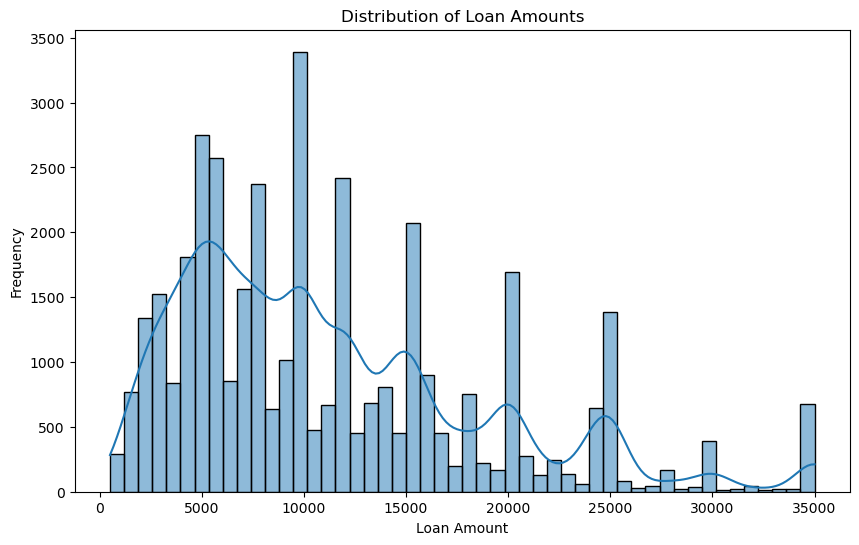

In [302]:
#Distribution of Loan Amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], bins=50, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


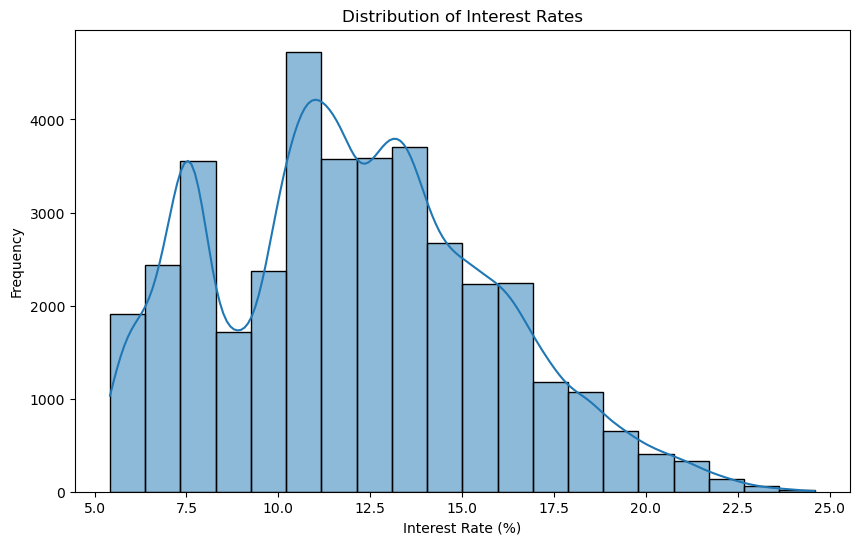

In [304]:
#Distribution of Interest Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['int_rate'] * 100, bins=20, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


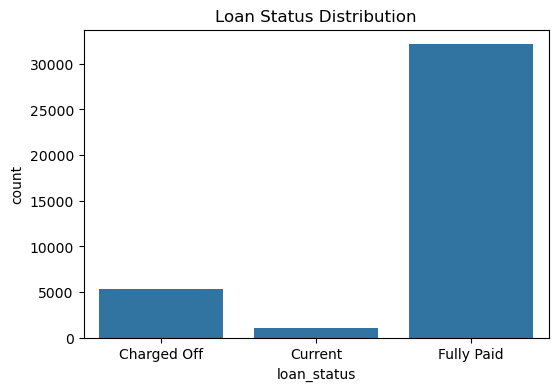

In [326]:
#Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status',data=df)
plt.title('Loan Status Distribution')
plt.xlabel('loan_status')
plt.ylabel('count')
plt.show()


## Bivariate Analysis (Two Variable Analysis)

In [329]:
#Loan Amount vs. Total Payment: A scatter plot to observe if there’s a relationship between the loan amount and the total payment made

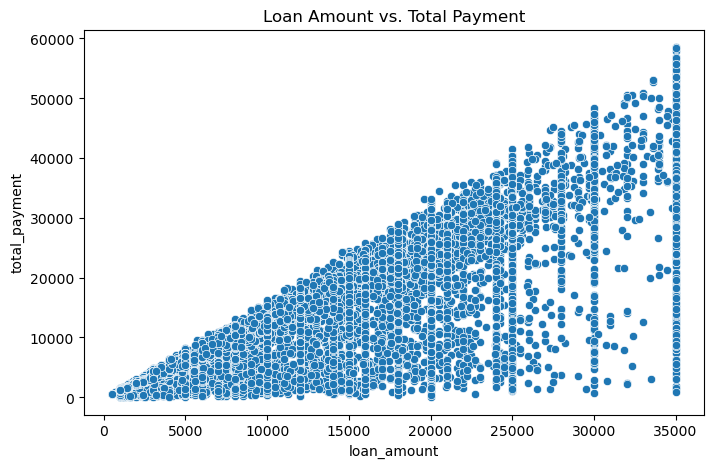

In [341]:

plt.figure(figsize=(8,5))
sns.scatterplot(df,x='loan_amount', y='total_payment')
plt.title('Loan Amount vs. Total Payment')
plt.xlabel('loan_amount')
plt.ylabel('total_payment')
plt.show()

In [343]:
# Loan Status vs. Interest Rate: Box plot to compare interest rates across different loan statuses.


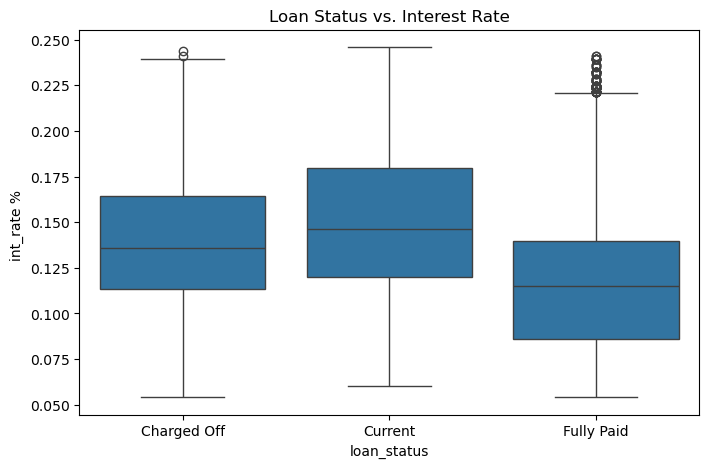

In [347]:

plt.figure(figsize=(8,5))
sns.boxplot(df,x='loan_status', y='int_rate')
plt.title('Loan Status vs. Interest Rate')
plt.xlabel('loan_status')
plt.ylabel('int_rate % ')
plt.show()

In [349]:
# Annual Income vs. Debt-to-Income Ratio: A scatter plot to examine how annual income correlates with the DTI.

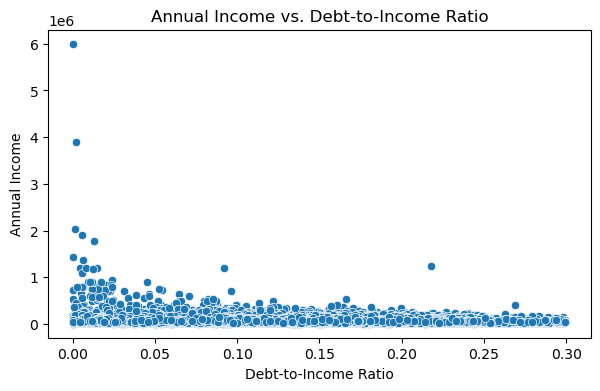

In [363]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='dti', y='annual_income', data=df)
plt.title('Annual Income vs. Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Annual Income')
plt.show()


## Time series analysis

In [378]:
df_monthly=(df.groupby('Month_Name')['loan_status'].count()).sort_values()

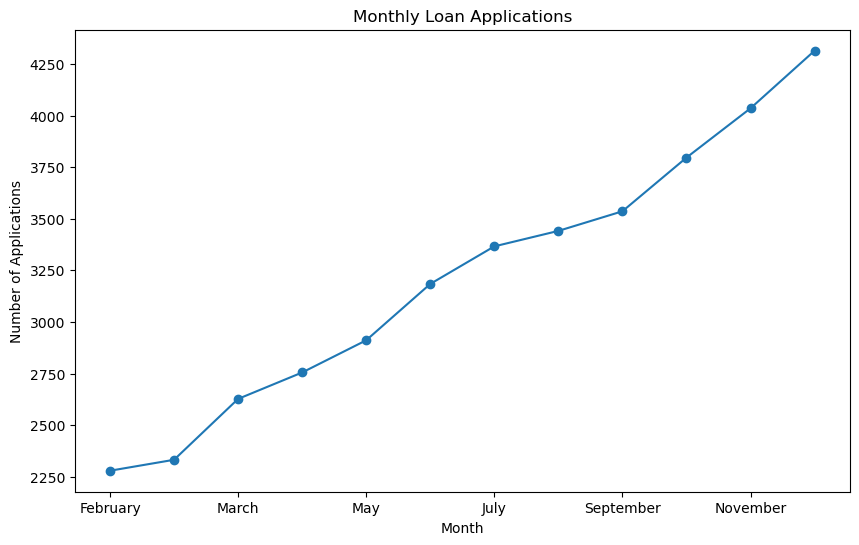

In [388]:
plt.figure(figsize=(10, 6))
df_monthly.plot(kind='line', marker='o')
plt.title('Monthly Loan Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()


In [402]:
df_monthly_funding = (df.groupby('Month_Name')['loan_amount'].sum()).sort_values()
df_monthly_payment = (df.groupby('Month_Name')['total_payment'].sum()).sort_values()

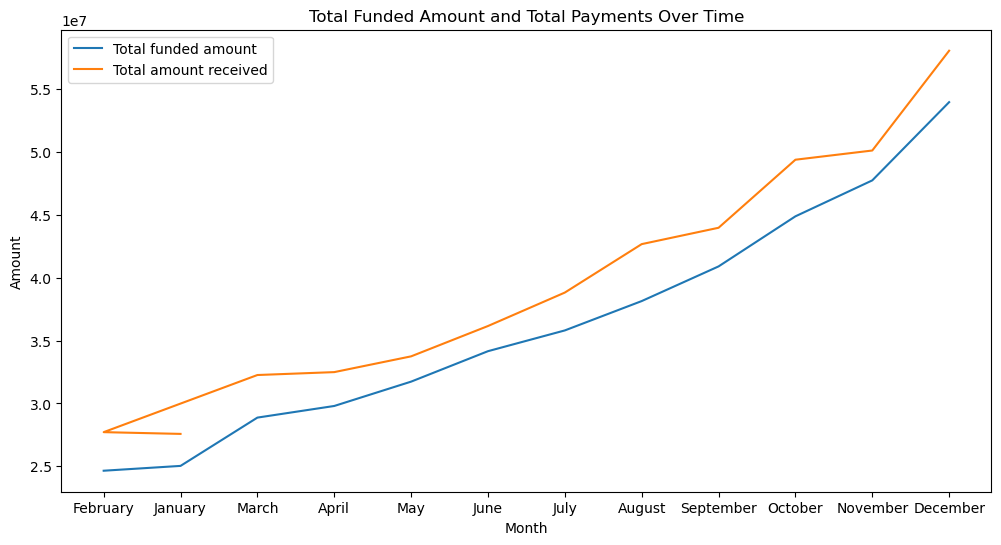

In [406]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_funding, label='Total funded amount')
plt.plot(df_monthly_payment, label='Total amount received')
plt.title('Total Funded Amount and Total Payments Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()




##  Categorical Analysis

In [410]:
# Loan Applications by Purpose: Bar plot to show the total number of loan applications by purpose.

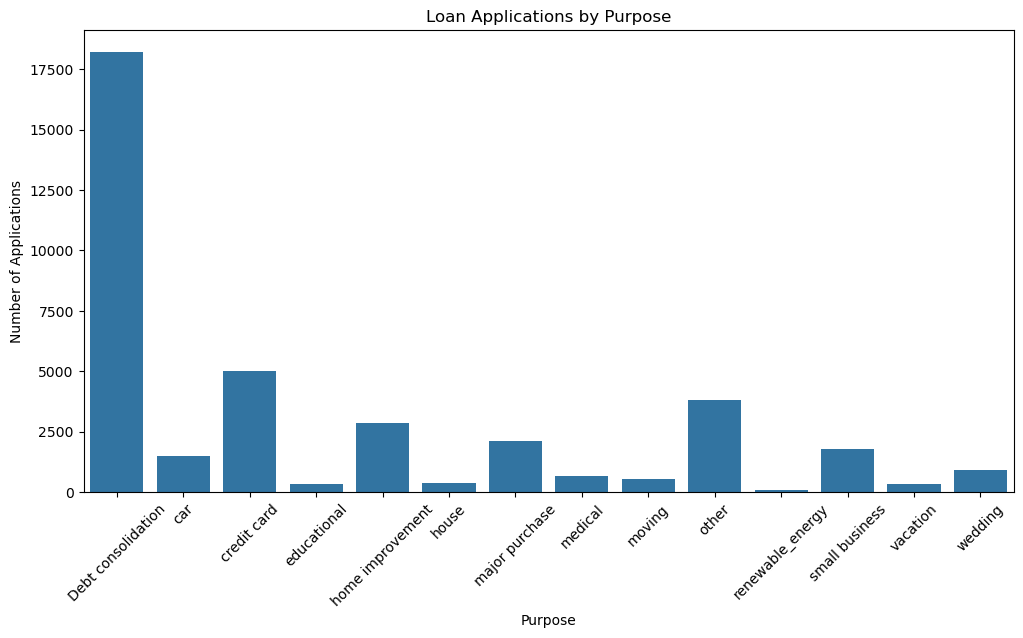

In [422]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=df)
plt.title('Loan Applications by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()


In [424]:
#Loan Status by Grade

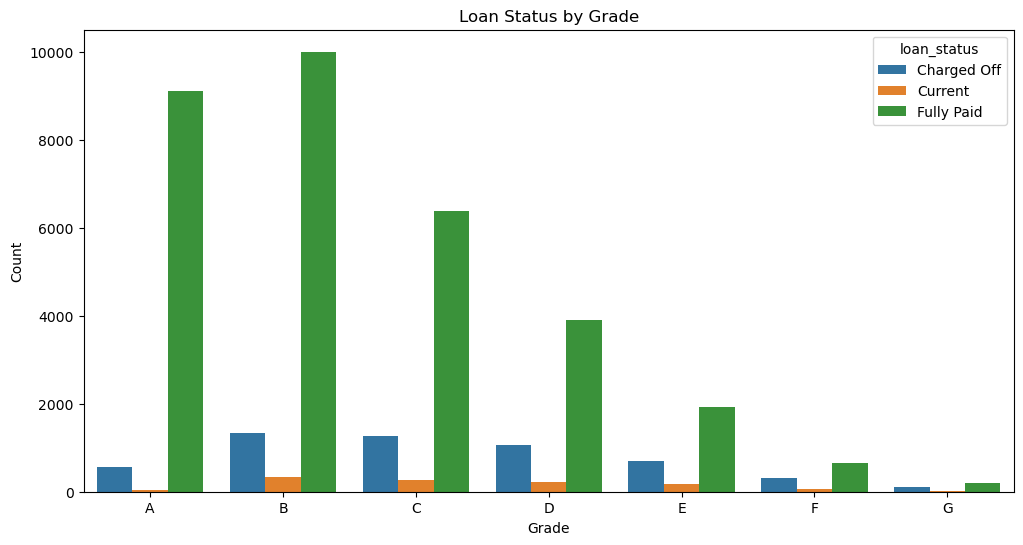

In [432]:
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


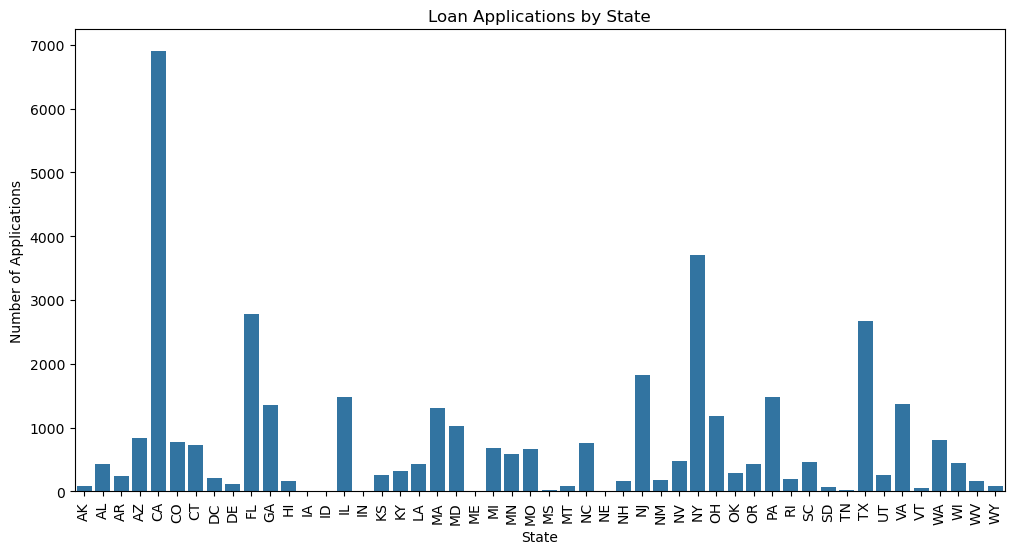

In [444]:
#Loan Applications by State
plt.figure(figsize=(12, 6))
sns.countplot(x='address_state', data=df)
plt.title('Loan Applications by State')
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.xticks(rotation=90)
plt.show()


In [456]:
df.groupby('address_state', observed=False)['loan_amount'].sum()


address_state
AK     1031800
AL     4949225
AR     2529700
AZ     9206000
CA    78484125
CO     8976000
CT     8435575
DC     2652350
DE     1138100
FL    30046125
GA    15480325
HI     1850525
IA       56450
ID       59750
IL    17124225
IN       86225
KS     2872325
KY     3504100
LA     4498900
MA    15051000
MD    11911400
ME        9200
MI     7829900
MN     6302600
MO     7151175
MS      139125
MT      829525
NC     8787575
NE       31700
NH     1917900
NJ    21657475
NM     1916775
NV     5307375
NY    42077050
OH    12991375
OK     3365725
OR     4720150
PA    15826525
RI     1883025
SC     5080475
SD      606150
TN      162175
TX    31236650
UT     2849225
VA    15982650
VT      504100
WA     8855525
WI     5070450
WV     1830525
WY      890750
Name: loan_amount, dtype: int64

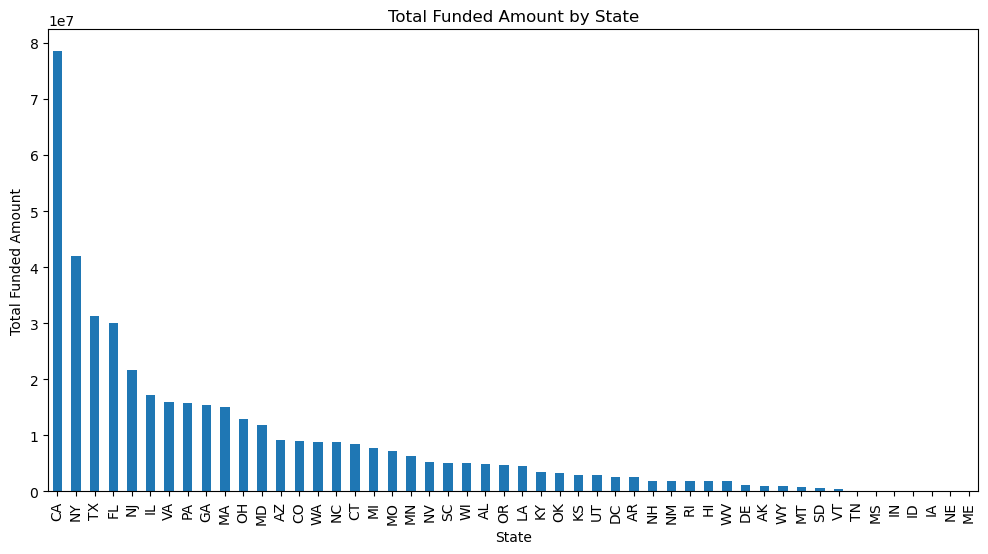

In [458]:
#Total Funded Amount by State: A bar chart to see how much funding has been disbursed across different states.
plt.figure(figsize=(12, 6))
state_funding = df.groupby('address_state',observed=False)['loan_amount'].sum().sort_values(ascending=False)
state_funding.plot(kind='bar')
plt.title('Total Funded Amount by State')
plt.xlabel('State')
plt.ylabel('Total Funded Amount')
plt.xticks(rotation=90)
plt.show()
